## Chaos
Notebook to explore Ch. 5

We are investigating the behavior or the driven, damped pendulum (DPP), which is a non-linear DE.

First, investigate how the behavior changes as drive strength increased.
1. start wd=2*pi, w_0=1.5*wd, beta=w_0/4, and theta_0 and v_theta_0 = 0.
2. Plot theta for gamma=0.2 for t from 0 to 10.  What's the period of the motion? Is this related to wd or w_0 or something else? What's the amplitude?  Sketch a picture on the whiteboard showing the range of motion of the pendulum.
3. Plot theta for gamma=0.9 for t from 0 to 10.  What's the period of the motion? Is this related to wd or w_0 or something else? What's the amplitude?  Sketch a picture on the whiteboard showing the range of motion of the pendulum.  To see that the behavior is actualy different now, focus on one oscillation after t=5.  Add to the plot a proper sin function.  Adjust the amplitude so it matches that of the pendulum.  What to you conclude?
4. Plot theta for gamma=1.06 for t from 0 to 15. Sketch a picture on the whiteboard showing the range of motion of the pendulum and describe its motion for t= 0 to 5.
5. A useful technique for checking if a motion is periodic is to get the value of theta for a series of times separated by the period.  Create a funciton to do this.  It should take as inputs the theta data and the period and it should return an array of theta values.  Use your function to test the data for gamma=1.06 for times greater than 30.  What do you find?
6. Plot theta for gamma=1.073 for t from 0 to 60. Interpret the motion of the pendulum.  Use the zoom tools to zoom in bottom of the oscillatory part of your graph.  Focus on times after t=30.  Describe what you see.
7. Use your period checking function to test the values of theta for gamma=1.073, for t>30.  What are these values telling you about the graph?
8. Plot theta for gamma=1.077 for t from 0 to 60. Interpret the motion of the pendulum.  Use the zoom tools to zoom in bottom of the oscillatory part of your graph.  Focus on times after t=30.  Describe what you see.
9. Use your period checking function to test the values of theta for gamma=1.077, for t>30.  What are these values telling you about the graph?
10. Now we want to see what happens if we change the initial conditions, without changing anything else.  Still using γ=1.077, set the initial conditions so that theta_0=-pi/2 and v_theta_0=0.  Plot both solutions on the same graph.  Make sure both plots are for γ=1.077.
11. Using the new initial conditions, run through the period-doubling cascade using gamma=1.06, 1.078, 1.081, 1.0826.  Finally, try γ=1.105.  Convince yourself that this graph doesn’t repeat exactly.  This is an example of chaos.
12. Go back to conditions for (1) and plot velocity vs angle.  This is called a phase space plot.  Compare to your angle vs. t graph.  What is it telling you?


In [1]:
# import pylab, set graph outputs to separate window, so we can use zoom tools
%pylab inline
from scipy.integrate import odeint

Populating the interactive namespace from numpy and matplotlib


In [2]:
def DrivenDampedPendulum(state, timep, betap, w_0, gammap, wd):
    """
    Function to return derivatives for driven, damped harmonic oscillator.
    theta_dot_dot = 2*beta*theta_dot - (w_0)**2 sin(theta) + gamma*cos(wd*t)
    calling routine must pass w_0, beta, gamma, and drive frequency wd
    """
    xdot=state[1]
#    vdot=-((w_0)**2)*sin(state[0])-2*(betap)*state[1]+(gammap)*cos(wd*time)

    vdot=-((w_0)**2)*sin(state[0])-2*(betap)*state[1]+(gammap)*(w_0**2)*cos(wd*timep)

    return array([xdot,vdot])

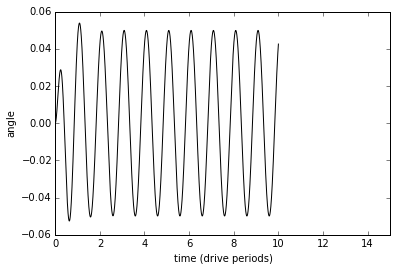

In [15]:
# Explore behavior of DDP, driven damped pendulum

wd=2*pi  # set drive freq to 2*pi, so that time is in units of drive period T
w_0=1.5*wd  # set natural freq to 1.5 times drive freq, so that drive is close (but lower than) resonance
beta = w_0/4
theta_0= 0 # initial angle is zero
v_theta_0 = 0.0  # initial velocity is zero
gamma=0.2

t_max=10
N=10000
# fill time array
time=linspace(0,t_max,N)
theta=linspace(0,2*pi)

# call odeint
solution=odeint(DrivenDampedPendulum, [theta_0,v_theta_0], time, args=(beta, w_0, gamma, wd))
# print(solution)

figure()
plot(time,solution[:,0]/(2*pi),"k-")
#plot(time,solution[:,0]/(2*pi),"k-", time, 2.5*sin(wd*time-1*pi/16))
xlabel("time (drive periods)")
ylabel("angle")
xlim(0,15)
#xlim(5,6)
#xlim(40,50)
# Change tick interval to pi/2
ax1=gca()
#start, end = ax1.get_ylim()
#ax1.set_yticks(np.arange(start, end, pi/2))

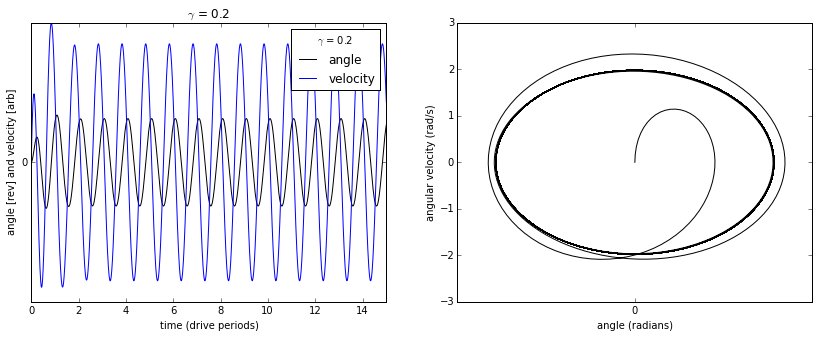

In [16]:
t_max=100
N=10000
pts_per_sec=N/t_max
skip=0*int(30*pts_per_sec)    # number of points in the beginning to skip when plotting.  set to zero for now.

# fill time array
time=linspace(0,t_max,N)

# call odeint
solution=odeint(DrivenDampedPendulum, [theta_0,v_theta_0], time, args=(beta, w_0, gamma, wd))
# print(solution)
pi_fraction=2.

fig1=figure()
ax1=subplot(1,2,1)
ax1.plot(time,solution[:,0],"k-",time,solution[:,1]/max(solution[:,1]))
#ax1.plot(time,solution[:,0],"k-",time,solution[:,1]/max(solution[:,1]), yunits=radians)
#ax1.plot(time,solution[:,0]/(2*pi),"k-",time,solution[:,1]/max(solution[:,1]))
#plot(time,solution[:,0]/(2*pi),"k-", time, 2.5*sin(wd*time-1*pi/16))
ax1.set_xlabel("time (drive periods)")
ax1.set_ylabel("angle [rev] and velocity [arb]")
ax1.set_xlim(0,15)
ax1.legend(["angle","velocity"],title="$\gamma$ = {:3}".format(gamma))
ax1.yaxis.set_major_locator(MultipleLocator(pi_fraction*pi))
ax1.yaxis.set_major_formatter(FuncFormatter(fractions_of_pi))
ax1.set_title("$\gamma$ = {:3}".format(gamma))
#xlim(5,6)
#xlim(40,50)
# Change tick interval to pi/2
ax1=gca()
#start, end = ax1.get_ylim()
#ax1.set_yticks(np.arange(start, end, pi/2))
ax2=subplot(1,2,2)
ax2.plot(solution[skip:,0],solution[skip:,1],"k-")
ax2.set_xlabel("angle (radians)")
ax2.set_ylabel("angular velocity (rad/s)")
#ax2.set_xlim(-2.5,-1.5)
ax2.xaxis.set_major_locator(MultipleLocator(pi_fraction*pi))
ax2.xaxis.set_major_formatter(FuncFormatter(fractions_of_pi))


fig1.set_size_inches(14,5)

In [4]:
# function to return text formating for tick label
# in units of of pi_fraction*pi.  Seems to work for pi_fraction both less than and greater than 1 
# (eg. 1/4pi or 2pi)
# requires matplotlib.ticker



def fractions_of_pi(x,pos):
    if np.isclose(x/(pi_fraction*pi)%(1./(pi_fraction)),0.):
        # x is an integer, so just return that
        if x==0:
#            print("x is zero!!!")
            return 0
        else:
#            print("x is an integer !!!!")
            return r'${:.0f} \pi$'.format(x/(pi))
    else:
        # this returns a latex formatted fraction
        # Could check if fraction can be reduced
        # if (1./pi_fraction)%(x/(pi_fraction*pi)) is close to zero, then it can
        return '$\\frac{{{:2.0f}}}{{{:2.0f}}} \pi$'.format(x/(pi_fraction*pi),1./pi_fraction)
        # if you don't want to use latex, you could use this commented
        # line, which formats the fraction as "1/13"
        ### return '{:2.0f}/{:2.0f}'.format(x/step,1./step)


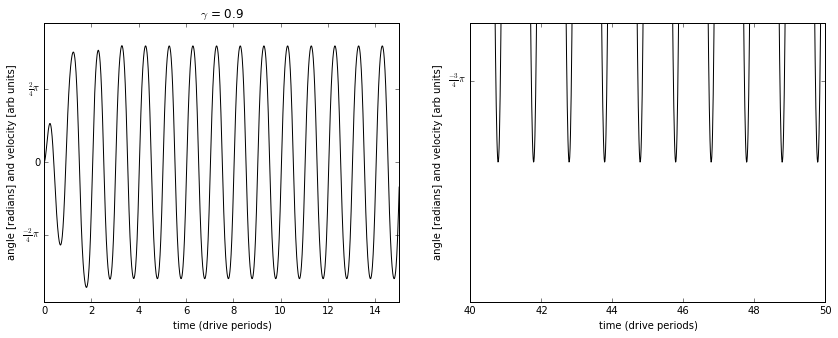

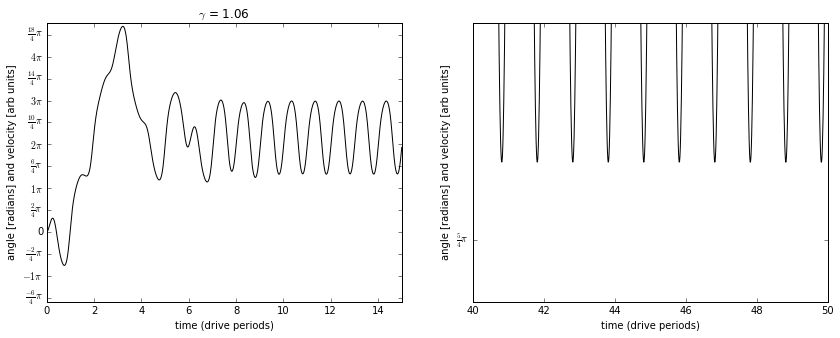

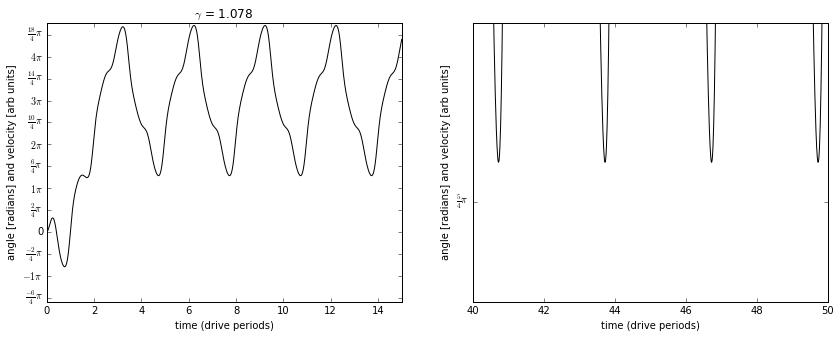

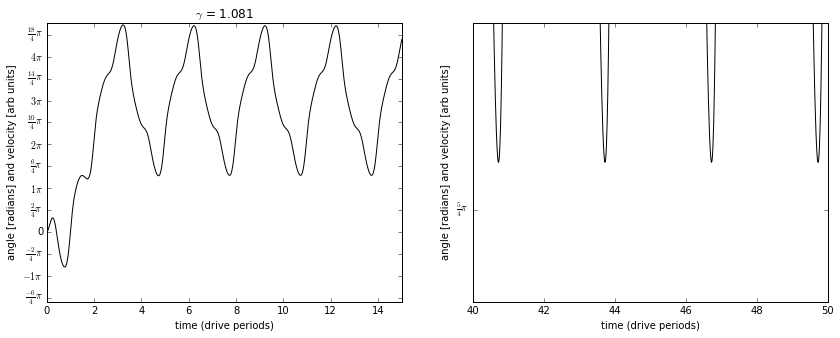

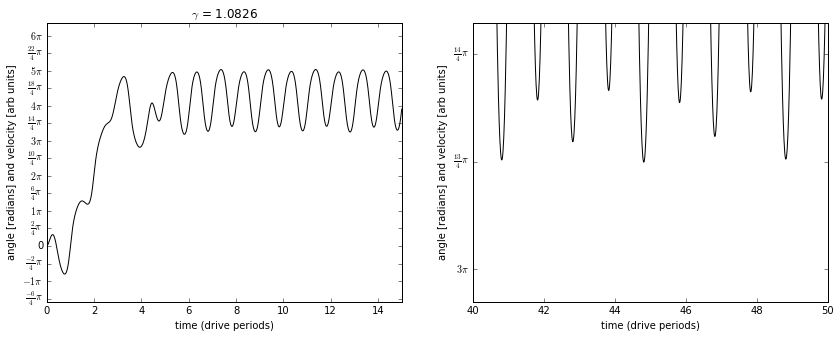

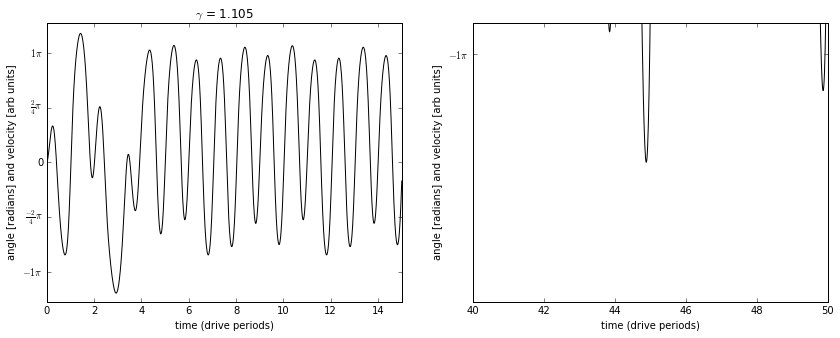

In [13]:
# Explore behavior of DDP, driven damped pendulum as function of drive gamma
# make side-by-side graphs
# restart this notebook, and run %pylab inline to set figs inline again
#%pylab inline
S = 6
gamma = zeros([S])
wd=2*pi  # set drive freq to 2*pi, so that time is in units of drive period T
w_0=1.5*wd  # set natural freq to 1.5 times drive freq, so that drive is close (but lower than) resonance
beta = w_0/4
#theta_0=-pi/2  # initial angle is neg pi/2
theta_0=0  # initial angle is zero
v_theta_0 = 0.0  # initial velocity is zero
gamma[0]=0.9
gamma[1]=1.06
gamma[2]=1.078
gamma[3]=1.081
gamma[4]=1.0826
gamma[5]=1.105
i = 0
t_max=100
N=10000
pts_per_sec=N/t_max
skip=0.0*int(30*pts_per_sec)    # number of points in the beginning to skip when plotting.  set to zero for now.

# fill time array
time=linspace(0,t_max,N)
for i in range (S):
    # call odeint
    solution=odeint(DrivenDampedPendulum, [theta_0,v_theta_0], time, args=(beta, w_0, gamma[i], wd))
    # print(solution)

    # make a figure
    fig1=figure()

    #First axes on that figure.  Setting up a 1-row, 2-col table of subplots
    ax1=subplot(1,2,1)
    ax1.plot(time,solution[:,0],"k-",)
    #ax1.plot(time,solution[:,0]/(2*pi),"k-",time,solution[:,1]/max(solution[:,1]))

    ax1.set_xlabel("time (drive periods)")
    ax1.set_ylabel("angle [radians] and velocity [arb units]")
    ax1.set_xlim(0,15)
    #xlim(5,6)
    #xlim(40,50)

    #ax1.legend(["angle","velocity"],title="$\gamma$ = {:3}".format(gamma))
    # put gamma in the title to this subplot.  
    ax1.set_title("$\gamma$ = {:3}".format(gamma[i]))

    # for tick labels: sets the "unit" of pi that will be used to label, eg 1/4pi or 1/2pi or even 2pi
    # pi_fraction=2.
    pi_fraction=1/2.
    # here are the calls that set the tick label formatting
    ax1.yaxis.set_major_locator(MultipleLocator(pi_fraction*pi))
    ax1.yaxis.set_major_formatter(FuncFormatter(fractions_of_pi))

    # second set of axes
    ax2=subplot(1,2,2)
    ax2.plot(time,solution[:,0],"k-",)

    ax2.set_xlabel("time (drive periods)")
    ax2.set_ylabel("angle [radians] and velocity [arb units]")
    ax2.set_xlim(40,50)
    # here's an attempt to automate the ylim for zoomed plot.  Probably will have to adjust by hand
    ymin=min(solution[int(40*pts_per_sec):,0])
    if ymin<0:
        ylow=1.1*ymin
        yhi=0.9*ymin
    else:
        ylow=0.9*ymin
        yhi=1.1*ymin

    ax2.set_ylim(ylow, yhi)

    # here are the calls that set the tick label formatting
    pi_fraction=1/4.
    ax2.yaxis.set_major_locator(MultipleLocator(pi_fraction*pi))
    ax2.yaxis.set_major_formatter(FuncFormatter(fractions_of_pi))

    # set the size of the figure in inches
    fig1.set_size_inches(14,5)

    # This displays an inline copy of fig if you happen to have started the notebook in "pop-up" mode
    #display(fig1)
